# Gender Recognition by Voice
### Project Overview:
This project has the intention of analyzing human voice samples in order to create multiple predictive models that can accurately identify the speakers as male or female.

### Voices Collection
The data is from Kaggle, which includs 20 features extracted from over 3000 audio samples by using R. All the instances are labeled by human, and the data file is in the format of csv. However, for the sake of learning and practicing, we decide to experience the whole process of accomplishing machine learning tasks. So instead of using the csv file we found on Kaggle, we collected more than 460 audio files from VoxForge, speech corpus, and used R to generated our own csv file. We also developed a shell script in order to organize all the audio files to make sure all the audio sample are from different speakers. The shell script is also included in this folder for reference. Due to the limitation of female speakers, and the poor quality of some audio tracks, we managed to generated a csv file that includes 20 features of 460 (230 with female speakers, and 230 with male speakers) samples, by using speech processing package provided by R.

### The Dataset
The dataset consists of 460 recorded voice samples, collected from male and female speakers. Exactly 50% of of the vectors are labeled female and 50% male. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages. Humans can hear sound waves with frequencies between about 20 Hz and 20 kHz, so we narrow the analyzed frequency range to 0hz-280hz (human vocal range) with a sound threshold of 15%. We take a random 80% samples for training and the rest 20% for test.

The dataset consists of 21 attribute vectors consisting of 20 acoustic properties. The following acoustic properties of each voice:

1. meanfreq: mean frequency (in kHz)
2. sd: standard deviation of frequency
3. median: median frequency (in kHz)
4. Q25: first quantile (in kHz)
5. Q75: third quantile (in kHz)
6. IQR: interquantile range (in kHz)
7. skew: skewness (see note in specprop description)
8. kurt: kurtosis (see note in specprop description)
9. sp.ent: spectral entropy
10. sfm: spectral flatness
11. mode: mode frequency
12. centroid: frequency centroid (see specprop)
13. meanfun: average of fundamental frequency measured across acoustic signal
14. minfun: minimum fundamental frequency measured across acoustic signal
15. maxfun: maximum fundamental frequency measured across acoustic signal
16. meandom: average of dominant frequency measured across acoustic signal
17. mindom: minimum of dominant frequency measured across acoustic signal
18. maxdom: maximum of dominant frequency measured across acoustic signal
19. dfrange: range of dominant frequency measured across acoustic signal
20. modindx: modulation index. 
21. label: male or female

In [1]:
import pandas as pd

In [2]:
voice=pd.read_csv("voice.csv")
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [83]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null float64
dtypes: float64(21)
memory usage: 519.8 KB


In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [4]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


In [5]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,...,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.668412,0.399987,0.697887,0.567448,0.788722,0.293484,0.086701,0.026385,0.643020,0.460686,...,0.668412,0.479161,0.139093,0.884834,0.278452,0.105184,0.230540,0.228653,0.186354,0.500000
std,0.141282,0.171832,0.145295,0.196990,0.102546,0.180012,0.122616,0.103192,0.184838,0.220233,...,0.141282,0.177428,0.098916,0.170873,0.178043,0.139395,0.161082,0.161146,0.128119,0.500079
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.586978,0.243425,0.633838,0.448602,0.719235,0.117820,0.043600,0.002754,0.506112,0.274377,...,0.586978,0.337413,0.043478,0.857144,0.139672,0.006452,0.094353,0.093616,0.107002,0.000000
50%,0.686980,0.420925,0.715516,0.566764,0.792710,0.335436,0.059432,0.004780,0.670306,0.445946,...,0.686980,0.466594,0.186995,0.954963,0.256955,0.040860,0.228020,0.226395,0.149465,0.500000
75%,0.754545,0.502086,0.797777,0.711036,0.870690,0.419146,0.080673,0.008857,0.781040,0.616331,...,0.754545,0.626213,0.196231,0.990585,0.396408,0.144086,0.320229,0.320100,0.224355,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

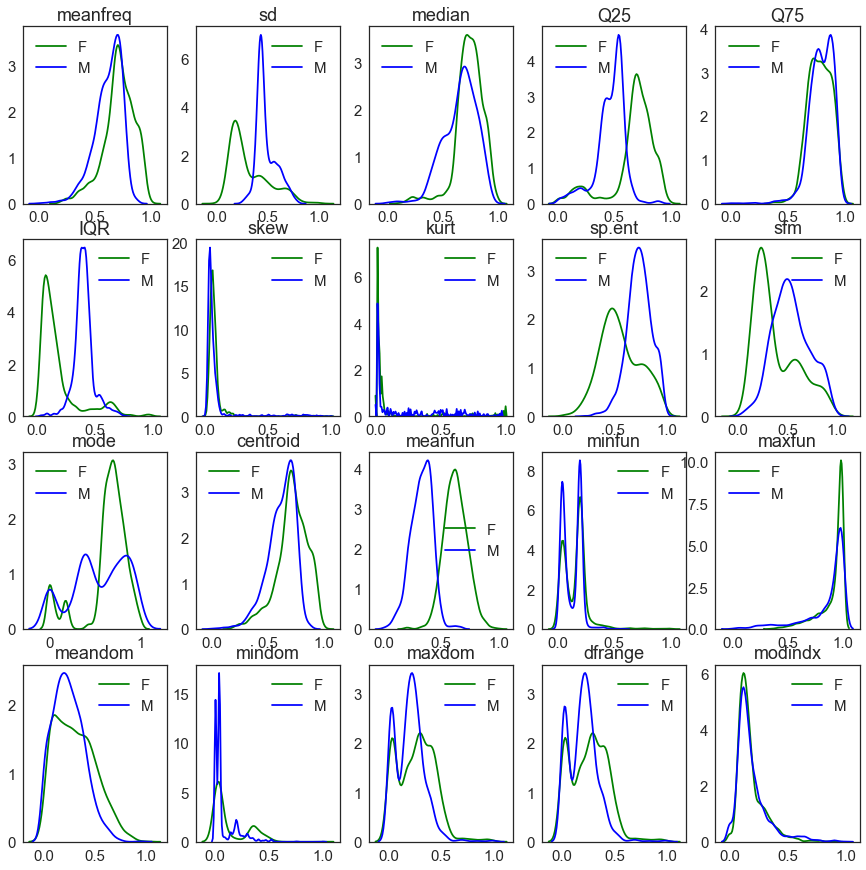

In [82]:
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i-1]], color= 'blue', label='M')

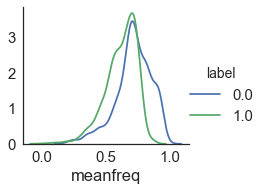

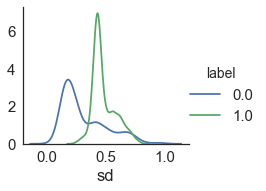

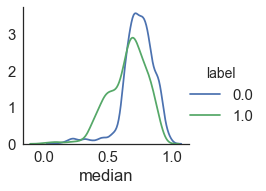

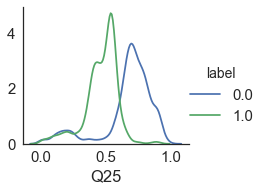

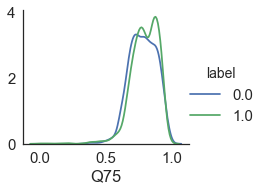

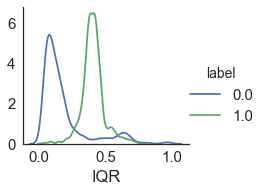

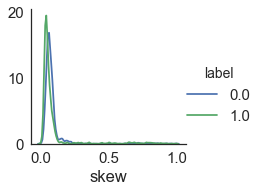

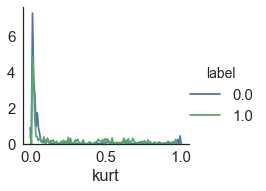

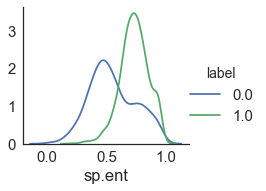

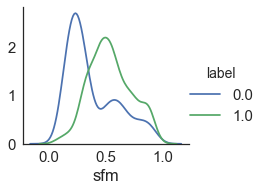

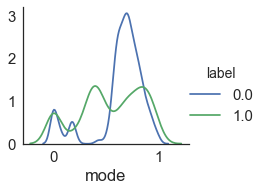

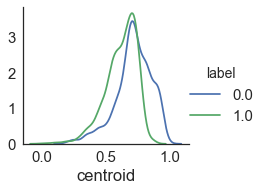

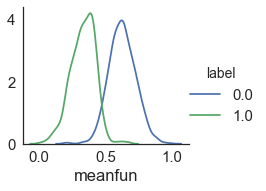

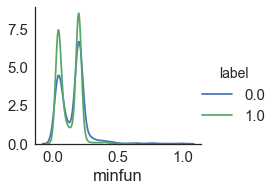

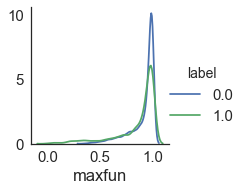

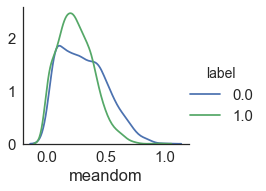

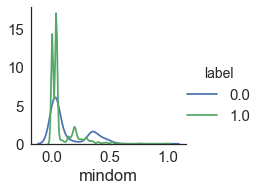

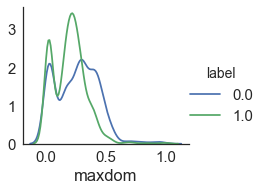

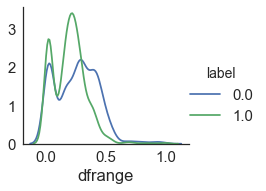

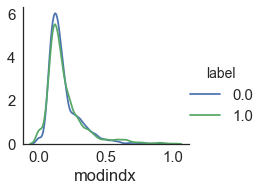

In [76]:
#Data Visualization
for i in voice.columns[:-1]:
    seaborn.FacetGrid(voice,hue='label',size=3).map(seaborn.kdeplot,i).add_legend()

At first glance, most significant features are IQR and meanfun. As one would expect, the fundamental frequencies exhibited by male voices are much lower than those exhibited by females and interquantile range exhibited by male voices are much higher than those exhibited by females. 

#### From all 20 features we can separate “meanfun” and “IQR”. 

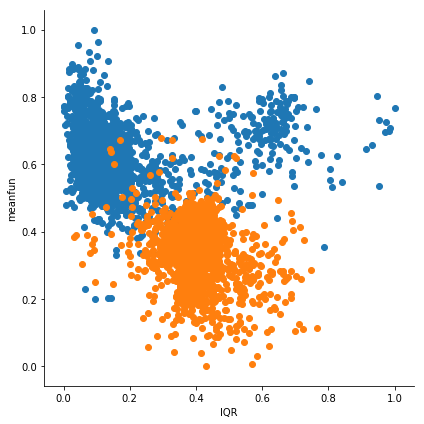

In [8]:
import matplotlib.pyplot as plt
seaborn.FacetGrid(voice,hue="label",size=6).map(plt.scatter,"IQR","meanfun")
plt.show()

As we could see, there are some samples that belong to male but graph tells us that it is female.

### Is it enough of this two features to make predictions? 
With this question, we will train our models with 368 train samples and 92 test samples with all features and with 2 features separately.